# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#In the past I've used tensorflow in a deep learning class so I'm comfortable with that

2024-02-01 15:32:43.193210: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-01 15:32:43.912041: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-01 15:32:43.916117: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-01 15:32:45.965513: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [37]:
df = pd.read_csv("states_edu.csv", header=0)
print(df.head())
df

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [38]:
print(len(df))
df['AVG_MATH_8_SCORE'].notna().sum()
# the dataframe has 1700 observations while there are only 600 grade 8 math scores, so we drop the nan values of our outcome variable
newdf = df.dropna(subset=['AVG_MATH_8_SCORE'])
len(newdf)

1715


602

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [40]:
newdf['YEAR'].nunique() #there are 13 unique values of years, so 33 years logged.

13

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [42]:
Michigan = newdf[newdf['STATE'] == "MICHIGAN"]
Ohio = newdf[newdf['STATE'] == "OHIO"]
print( "Michigan: ", Michigan['AVG_MATH_8_SCORE'].mean(), " Ohio: ", Ohio['AVG_MATH_8_SCORE'].mean())
#unfortunately Ohio has a higher average across all years in the dataset, Mich with 276 and OH with 282 roughly

Michigan:  276.1666666666667  Ohio:  282.25


Find the average for your chosen test across all states in 2019

In [43]:
newdf['AVG_MATH_8_SCORE'].mean()
#278.28 average

278.28073089700996

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [44]:
math_by_state = newdf.groupby('STATE')
math_by_state['AVG_MATH_8_SCORE'].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [45]:
newdf['INSTRUCTION_RATIO'] = newdf['INSTRUCTION_EXPENDITURE'] / newdf['TOTAL_EXPENDITURE'] # the ratio of how much of total expenses is spent on instruction
newdf['EXPENSE_PER_STUDENT'] = newdf['INSTRUCTION_EXPENDITURE']/newdf['GRADES_ALL_G']
newdf['12_K_RATIO'] = newdf['GRADES_12_G']/newdf['GRADES_KG_G']
newdf

/tmp/ipykernel_13132/4120246885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['INSTRUCTION_RATIO'] = newdf['INSTRUCTION_EXPENDITURE'] / newdf['TOTAL_EXPENDITURE'] # the ratio of how much of total expenses is spent on instruction
/tmp/ipykernel_13132/4120246885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['EXPENSE_PER_STUDENT'] = newdf['INSTRUCTION_EXPENDITURE']/newdf['GRADES_ALL_G']
/tmp/ipykernel_13132/4120246885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_RATIO,EXPENSE_PER_STUDENT,12_K_RATIO
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,0.558333,2.025197,0.742283
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,0.422130,2.132082,0.699292
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,0.553248,2.184247,0.825132
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,0.529091,2.732512,0.626906
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,0.503079,2.680986,0.725666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN,NaN,NaN


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

I created the expense per student since I agree with the idea that spending more money on education usually leads to better education. This idea is also reflected by my instruction ratio feature. States that spend a higher proportion on education compared to other states should hopefully fare better with their scores.

Lastly, I created the 12 to K (kindergarten) ratio. According to google, around 5 percent of American kids drop out of high school on average. This ratio may give an insight into which states have higher dropout rates. If you have a low 12 to K ratio your state has way less kids that are in grade 12 compared to kindergarten, which helps predict how good the education in your state is. Some of this may be due to rapid population growth in some states compared to others, but some of it is due to the dropout rates, that have actually decreased by 3 percent since 2010, so this ratio analyzed in other years is pretty important.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

0.13211548728199993

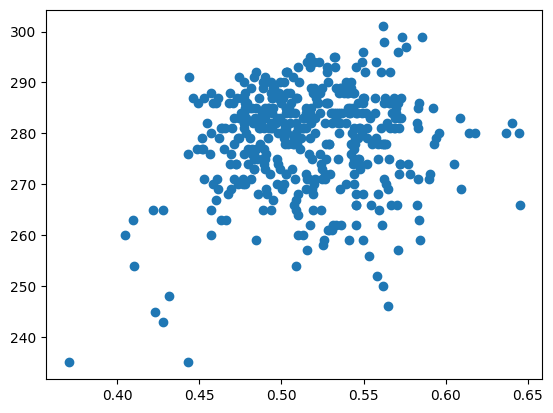

In [48]:
plt.scatter(newdf['INSTRUCTION_RATIO'], newdf['AVG_MATH_8_SCORE'])
newdf["INSTRUCTION_RATIO"].corr(newdf['AVG_MATH_8_SCORE'])

**<CAPTION FOR VIZ 1>**

seen from the correlation and the scatter plot of Math score vs instruction ration, there isn't a strong relationship between the two variables

**Visualization 2**

0.5037864842887363

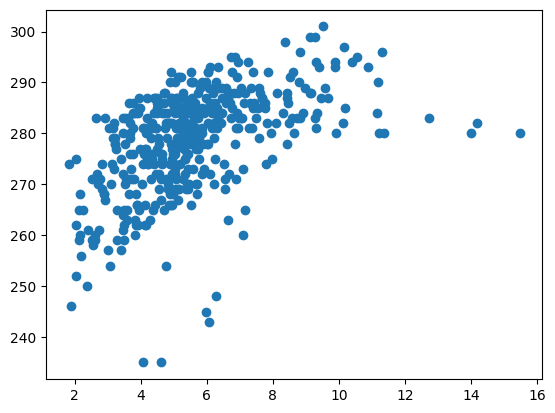

In [49]:
plt.scatter(newdf['EXPENSE_PER_STUDENT'], newdf['AVG_MATH_8_SCORE'])
newdf["EXPENSE_PER_STUDENT"].corr(newdf['AVG_MATH_8_SCORE'])

**<CAPTION FOR VIZ 2>**
there is a 0.5 linear correlation between expense per student and avg math score, but I don't think the relationship is exactly linear. As Expense per student increases, so does score, but it is more like an arc. there seems to be a point where more spending doesn't help the score.

0.651535656353165


,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_RATIO,EXPENSE_PER_STUDENT,12_K_RATIO
YEAR,1.000000,0.004867,0.177630,0.201508,0.162610,0.173531,0.170626,0.172241,0.188143,0.111292,...,0.004152,0.019377,0.019975,0.641096,0.552717,0.233523,0.136554,-0.091813,0.589847,0.331493
ENROLL,0.004867,1.000000,0.939762,0.942301,0.937404,0.866923,0.942144,0.900477,0.944623,0.971302,...,0.999081,0.997598,0.999556,-0.018105,-0.047459,-0.063119,-0.118749,-0.073191,-0.009445,-0.046245
TOTAL_REVENUE,0.177630,0.939762,1.000000,0.927789,0.972673,0.963901,0.999131,0.989864,0.994821,0.947041,...,0.932417,0.947033,0.924236,0.138305,0.095045,0.052721,-0.020872,0.014577,0.280002,0.068585
FEDERAL_REVENUE,0.201508,0.942301,0.927789,1.000000,0.923952,0.842417,0.927398,0.889727,0.930912,0.956284,...,0.937999,0.948547,0.919194,0.089750,0.023831,-0.072183,-0.146961,-0.087306,0.118309,0.004004
STATE_REVENUE,0.162610,0.937404,0.972673,0.923952,1.000000,0.878473,0.970756,0.954246,0.968563,0.949293,...,0.929402,0.948190,0.922438,0.101875,0.052929,-0.005316,-0.073948,-0.009574,0.220519,0.060461
LOCAL_REVENUE,0.173531,0.866923,0.963901,0.842417,0.878473,1.000000,0.964057,0.968989,0.956255,0.867527,...,0.860163,0.870298,0.853824,0.174632,0.145453,0.133927,0.061355,0.059873,0.352869,0.085334
TOTAL_EXPENDITURE,0.170626,0.942144,0.999131,0.927398,0.970756,0.964057,1.000000,0.990369,0.993477,0.947092,...,0.934726,0.948384,0.926677,0.134334,0.091851,0.048960,-0.025748,0.009604,0.275049,0.063282
INSTRUCTION_EXPENDITURE,0.172241,0.900477,0.989864,0.889727,0.954246,0.968989,0.990369,1.000000,0.975708,0.905254,...,0.891696,0.906615,0.886988,0.137642,0.097090,0.072616,-0.002501,0.090477,0.333550,0.068096
SUPPORT_SERVICES_EXPENDITURE,0.188143,0.944623,0.994821,0.930912,0.968563,0.956255,0.993477,0.975708,1.000000,0.954310,...,0.937024,0.952530,0.929678,0.143339,0.099414,0.050303,-0.018439,-0.021744,0.262237,0.072906
OTHER_EXPENDITURE,0.111292,0.971302,0.947041,0.956284,0.949293,0.867527,0.947092,0.905254,0.954310,1.000000,...,0.968159,0.976428,0.970794,0.042818,-0.010455,-0.039064,-0.100890,-0.075420,0.057454,-0.004441


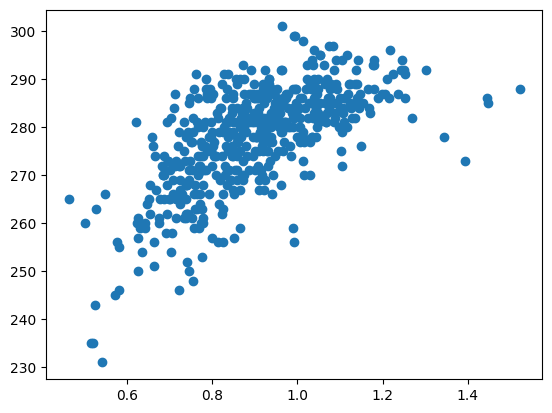

In [50]:
plt.scatter(newdf['12_K_RATIO'], newdf['AVG_MATH_8_SCORE'])
print(newdf["12_K_RATIO"].corr(newdf['AVG_MATH_8_SCORE']))
corr = newdf.corr(numeric_only=True)
corr
#the 12 to k ratio actually has a relatively strong correlation with the math scores compared to other features.
#the year, expense ratio and reading score also have a high correlation

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [12]:
from sklearn.model_selection import train_test_split


In [136]:
#use 12_kratio, expense per student, g8 reading score, and year since they have the highest correlations
X = newdf[['YEAR','EXPENSE_PER_STUDENT','AVG_READING_8_SCORE', '12_K_RATIO']].dropna()
y = newdf.loc[X.index]['AVG_MATH_8_SCORE']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size= 0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [54]:
# import your sklearn class here

602

In [142]:
# create your model here
# model = 
def education_model():
  input_dim = X.shape[1]
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
                     loss="mean_squared_error",
                     metrics=["MeanAbsoluteError"])
  return model
model = education_model()

Epoch 1/100
7/7 [==============================] - 0s 20ms/step - loss: 76130.4453 - mean_absolute_error: 275.6789 - val_loss: 64020.1836 - val_mean_absolute_error: 252.6462
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 56321.4531 - mean_absolute_error: 235.7440 - val_loss: 40435.4922 - val_mean_absolute_error: 196.7795
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 34130.5664 - mean_absolute_error: 176.9567 - val_loss: 23334.5879 - val_mean_absolute_error: 143.8994
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 19689.3516 - mean_absolute_error: 129.8670 - val_loss: 12764.0801 - val_mean_absolute_error: 106.2319
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 10688.2100 - mean_absolute_error: 92.4560 - val_loss: 6545.2173 - val_mean_absolute_error: 71.0630
Epoch 6/100
1/7 [===>..........................] - ETA: 0s - loss: 7881.6631 - mean_absolute_error: 74.7734

7/7 [==============================] - 0s 8ms/step - loss: 5553.5381 - mean_absolute_error: 64.5849 - val_loss: 4038.3872 - val_mean_absolute_error: 53.4106
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 3546.2180 - mean_absolute_error: 48.0876 - val_loss: 2677.6790 - val_mean_absolute_error: 43.4315
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 2437.8555 - mean_absolute_error: 37.7931 - val_loss: 1843.2610 - val_mean_absolute_error: 36.3967
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 1720.2646 - mean_absolute_error: 31.6556 - val_loss: 1136.8729 - val_mean_absolute_error: 28.2285
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 1032.1764 - mean_absolute_error: 24.9179 - val_loss: 829.7540 - val_mean_absolute_error: 22.7705
Epoch 11/100
7/7 [==============================] - 0s 7ms/step - loss: 660.8987 - mean_absolute_error: 19.1477 - val_loss: 816.9604 - val_mean_absolute_error: 20.1365

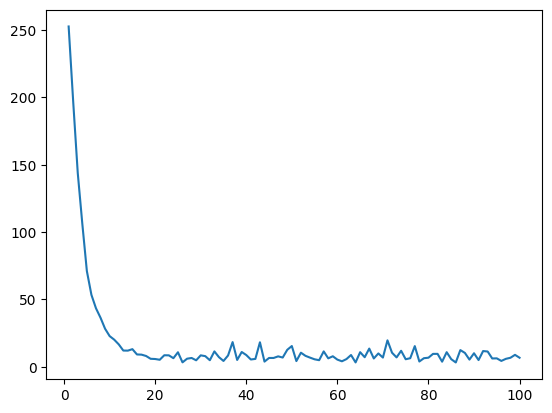

In [143]:
history = model.fit(X_train,y_train, epochs=100, validation_data=(X_valid, y_valid))
val_loss = history.history["val_mean_absolute_error"]
plt.plot(np.arange(1,len(val_loss)+1),val_loss)

In [144]:


#tf.tensordot(y_pred, y_test, axes = 1)


4/4 [==============================] - 0s 3ms/step - loss: 69.9911 - mean_absolute_error: 6.7659


[69.99114990234375, 6.765939235687256]

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [150]:
print(model.evaluate(X_test, y_test))
print(y_test, model.predict(X_test))
print(df['AVG_MATH_8_SCORE'].mean())

4/4 [==============================] - 0s 4ms/step - loss: 69.9911 - mean_absolute_error: 6.7659
[69.99114990234375, 6.765939235687256]
4/4 [==============================] - 0s 2ms/step
987     273.0
603     268.0
1107    276.0
1116    295.0
668     281.0
        ...  
800     285.0
869     277.0
988     289.0
1219    288.0
917     286.0
Name: AVG_MATH_8_SCORE, Length: 108, dtype: float64 [[271.4852 ]
 [260.6817 ]
 [276.74124]
 [298.32022]
 [270.25766]
 [301.04184]
 [271.41483]
 [274.5142 ]
 [281.53015]
 [271.96075]
 [258.6167 ]
 [308.0782 ]
 [272.88272]
 [289.3589 ]
 [270.96573]
 [260.24927]
 [289.9573 ]
 [286.13968]
 [276.93442]
 [288.80347]
 [280.5609 ]
 [281.74527]
 [273.12592]
 [263.75482]
 [288.37958]
 [280.06082]
 [288.07474]
 [287.64005]
 [269.8959 ]
 [268.62888]
 [281.53586]
 [259.78107]
 [295.29153]
 [277.80566]
 [264.6266 ]
 [267.7766 ]
 [267.65332]
 [292.2043 ]
 [263.69904]
 [272.40894]
 [287.52164]
 [274.9922 ]
 [277.52686]
 [281.2423 ]
 [269.19778]
 [281.7074 ]
 [259.818

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

-320.9473573791416
[0.15196331 0.0593267  1.11307366 2.94975263]
0.7596989177388325
3.975662754093297


Text(0.5, 1.0, 'Model Behavior On Training Set')

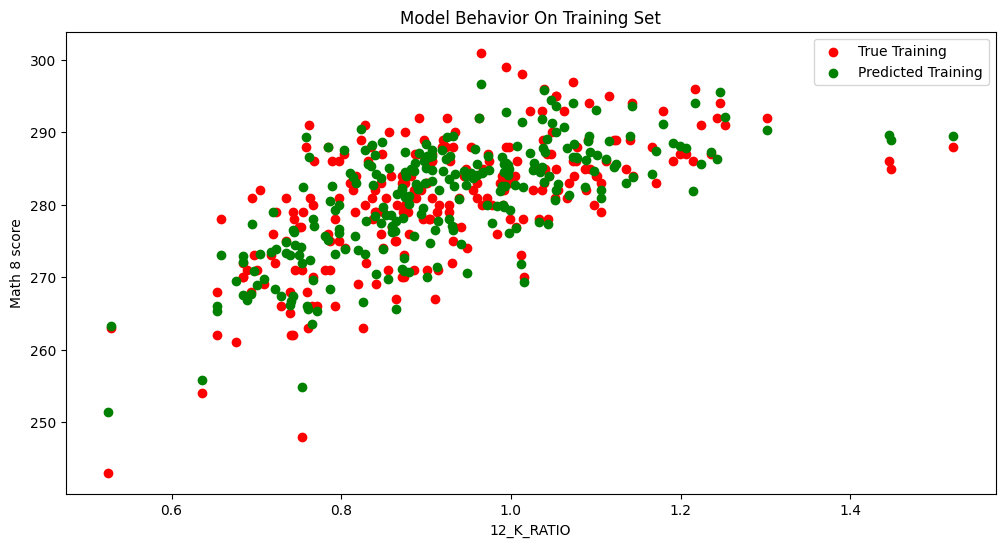

In [160]:
#I will make a regular regression here
RX_train, RX_test, Ry_train, Ry_test = train_test_split(X, y, test_size= 0.3, random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(RX_train, Ry_train)
print(model.intercept_)
print(model.coef_)
print(model.score(RX_test, Ry_test)) #0.76
print(np.mean((model.predict(RX_test)-Ry_test)**2)**0.5) #3.97

col_name = '12_K_RATIO'

f = plt.figure(figsize=(12,6))
plt.scatter(RX_train[col_name], Ry_train, color = "red")
plt.scatter(RX_train[col_name], model.predict(RX_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

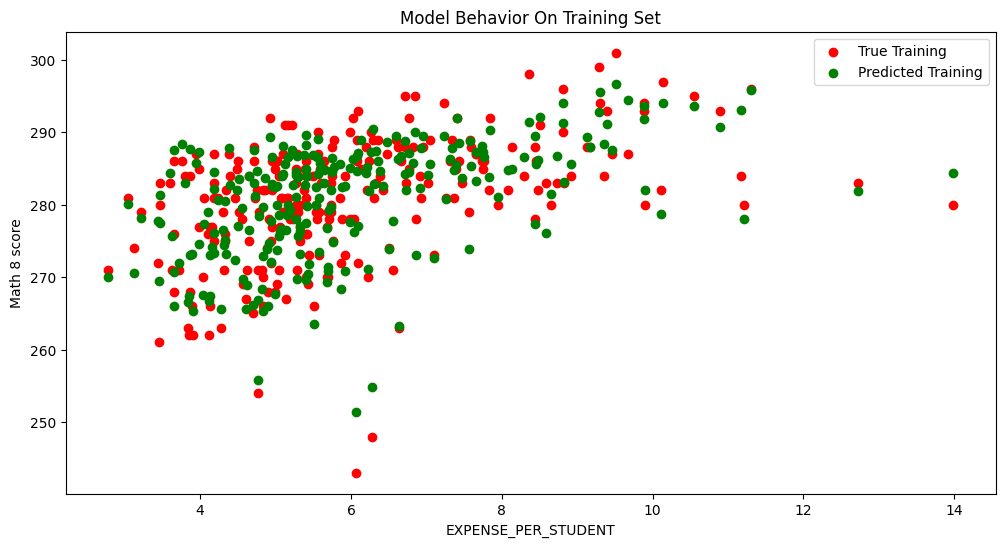

In [162]:
col_name = 'EXPENSE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(RX_train[col_name], Ry_train, color = "red")
plt.scatter(RX_train[col_name], model.predict(RX_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

I have taken a deep learning class in the past, so I wanted to jog the memory by doing a tensorflow sequential model. This allowed me to predict the math scores using the three features I identified to have a strong correlation with the scores. A neural network model is cool, but has no real application here: I only have around 600 datapoints, and having to split them into a validation set too really stretched the model's capabilities thin. The mean absolute error hovers around 7 after training, as shown by the graph of validation mean absolute error throughtout the epochs above. because I had a tensor i could not do correlations or R^2 analysis (at least to my current knowledge). My model evaluation puts my mean squared error at 70 and mean absolute error at 6.7. I don't think the model performance is much if at all better than a regular regression with 1 variable because of the limited data. I just liked the idea of showing what I can do outside of an sklearn regression.

Update- I later made a regression and got an r^2 of 0.76! not bad, as well as a mean squared error of 3.97. So the multiple regression was better than my deep learning model. with more data my model would eventually outperform the regression.